1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

Autovalori calcolati dalla matrice di covarianza:
[ 2.11848041e+01 -2.50416923e-15  2.70912900e+00]
Autovettori calcolati dalla matrice di covarianza:
[[-0.08548421 -0.81649658  0.57098667]
 [-0.61382879 -0.40824829 -0.67568302]
 [-0.78479721  0.40824829  0.46629033]]

Autovalori calcolati con SVD:
[2.11848041e+01 2.70912900e+00 2.99082958e-15]
Autovettori calcolati con SVD:
[[-0.08548421  0.57098667 -0.81649658]
 [-0.61382879 -0.67568302 -0.40824829]
 [-0.78479721  0.46629033  0.40824829]]

Percentuale del dataframe spiegata dagli autovalori: [8.86618541e+01 1.13381459e+01 1.25171087e-14] 

I nuovi autovettori sono:
[[-0.08548421  0.57098667  0.        ]
 [-0.61382879 -0.67568302  0.        ]
 [-0.78479721  0.46629033  0.        ]] 

Nuovo dataframe risultante:
     Component 1  Component 2  Component 3
0       2.126257    -2.390192          0.0
1     -14.790223    -2.806559          0.0
2      12.048756     2.360388          0.0
3      -1.134141     3.766380          0.0
4      -1.57

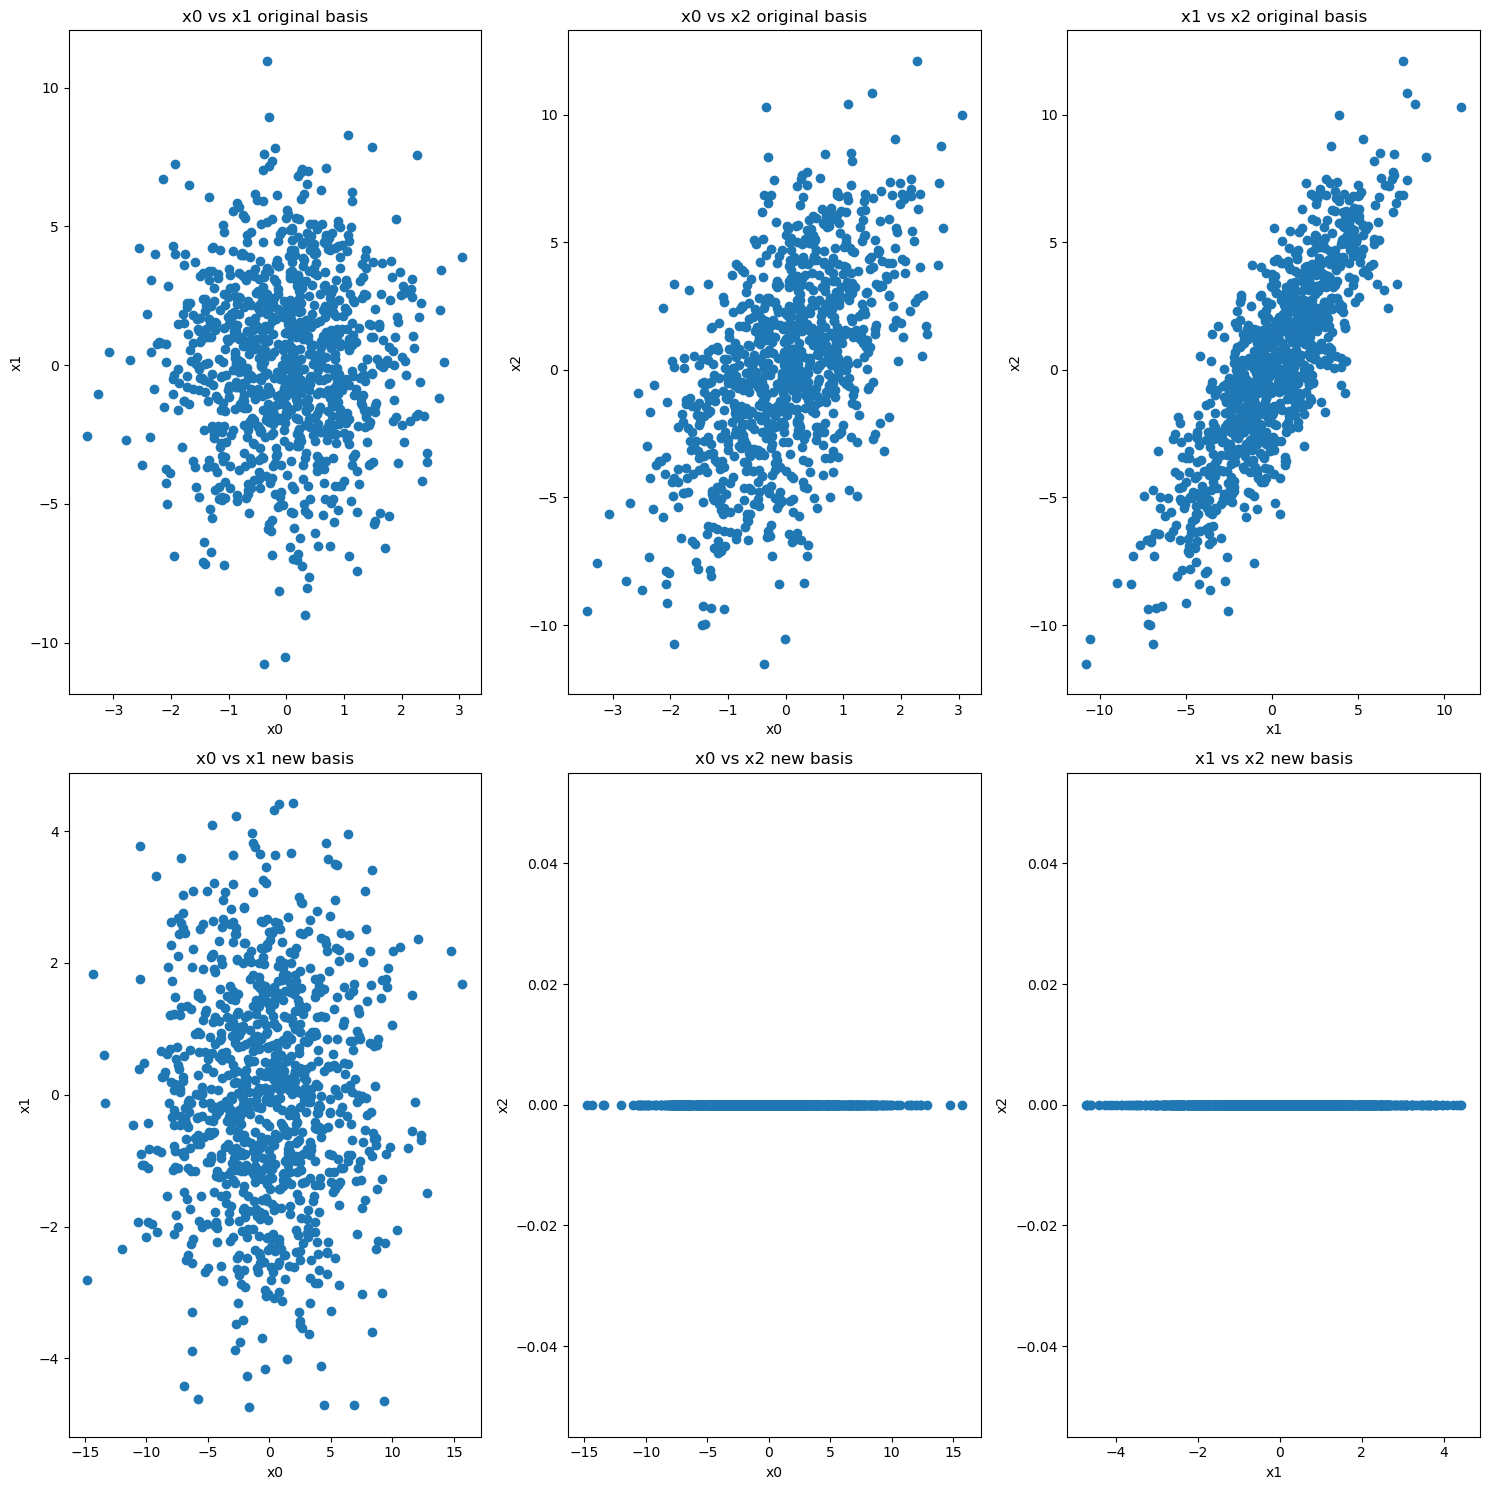

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

L = 1000
x1 = np.random.normal(0, 1, L)
x2 = np.random.normal(0, 3, L)
x3 = 2*x1 + x2
dict = {'Feature 1': x1, 'Feature 2': x2, 'Feature 3': x3}
data = pd.DataFrame(dict)
autoval, autovet = np.linalg.eig(data.cov())
print("Autovalori calcolati dalla matrice di covarianza:")
print(autoval)
print("Autovettori calcolati dalla matrice di covarianza:")
print(autovet)
print()
U, sigma, V = np.linalg.svd(data.cov())
eigenvalues = np.matmul(sigma, (np.matmul(V ,U)))
eigenvectors = U
print("Autovalori calcolati con SVD:")
print(eigenvalues)
print("Autovettori calcolati con SVD:")
print(eigenvectors)
print()
#I valori sono simili ma non uguali

#Calcolo la variabilità coperta dai vari autovalori
tot_variance = np.sum(eigenvalues)
explained = eigenvalues / tot_variance
print("Percentuale del dataframe spiegata dagli autovalori:", explained*100, "\n")
'''
Considerando che la terza componente è una combinazione lineare delle altre 2 è normale che
la variabilità associata al suo autovalore e il suo autovalore stesso siano piccoli
'''

#riduco la dimensione degli autovettori
obiettivo = 0.99
#sommo la varianza passo passo
cumulative_variance = np.cumsum(explained)
#trovo il primo indice in cui ho >99% variabilità
dimens = np.argmax(cumulative_variance >= obiettivo) + 1
reduced = eigenvectors.copy()
#rimuovo i vettori successivi settandoli a 0
reduced[:, dimens] = 0
print("I nuovi autovettori sono:")
print(reduced, "\n")

#Sistemo il dataframe di conseguenza
data99 = pd.DataFrame(data.values.dot(reduced), columns=["Component 1", "Component 2", "Component 3"])
print("Nuovo dataframe risultante:")
print(data99)

fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=(15, 15))
axs[0, 0].scatter(data["Feature 1"], data["Feature 2"])
axs[0, 0].set_title("x0 vs x1 original basis")
axs[0, 0].set_xlabel("x0")
axs[0, 0].set_ylabel("x1")
axs[0, 1].scatter(data["Feature 1"], data["Feature 3"])
axs[0, 1].set_title("x0 vs x2 original basis")
axs[0, 1].set_xlabel("x0")
axs[0, 1].set_ylabel("x2")
axs[0, 2].scatter(data["Feature 2"], data["Feature 3"])
axs[0, 2].set_title("x1 vs x2 original basis")
axs[0, 2].set_xlabel("x1")
axs[0, 2].set_ylabel("x2")

axs[1, 0].scatter(data99["Component 1"], data99["Component 2"])
axs[1, 0].set_title("x0 vs x1 new basis")
axs[1, 0].set_xlabel("x0")
axs[1, 0].set_ylabel("x1")
axs[1, 1].scatter(data99["Component 1"], data99["Component 3"])
axs[1, 1].set_title("x0 vs x2 new basis")
axs[1, 1].set_xlabel("x0")
axs[1, 1].set_ylabel("x2")
axs[1, 2].scatter(data99["Component 2"], data99["Component 3"])
axs[1, 2].set_title("x1 vs x2 new basis")
axs[1, 2].set_xlabel("x1")
axs[1, 2].set_ylabel("x2")
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

Autovalori calcolati con SVD:
[2.25222946e+01 2.86649342e+00 1.83216983e-15]
Autovettori calcolati con SVD:
[[-0.07906611  0.57191073 -0.81649658]
 [-0.62137862 -0.66874655 -0.40824829]
 [-0.77951085  0.47507492  0.40824829]]

I nuovi autovettori sono:
[[-0.07906611  0.57191073  0.        ]
 [-0.62137862 -0.66874655  0.        ]
 [-0.77951085  0.47507492  0.        ]] 

Nuovo dataframe risultante:
     Component 1  Component 2  Component 3
0      -0.030625    -2.648534          0.0
1     -16.423351    -2.766072          0.0
2      14.536700     2.786944          0.0
3      -1.006124     3.466786          0.0
4      -2.025577    -0.025023          0.0
..           ...          ...          ...
995     9.111040     0.294021          0.0
996     3.512733     0.060259          0.0
997     2.170740     2.274439          0.0
998     2.462794    -2.154694          0.0
999    -0.610468    -1.905483          0.0

[1000 rows x 3 columns]


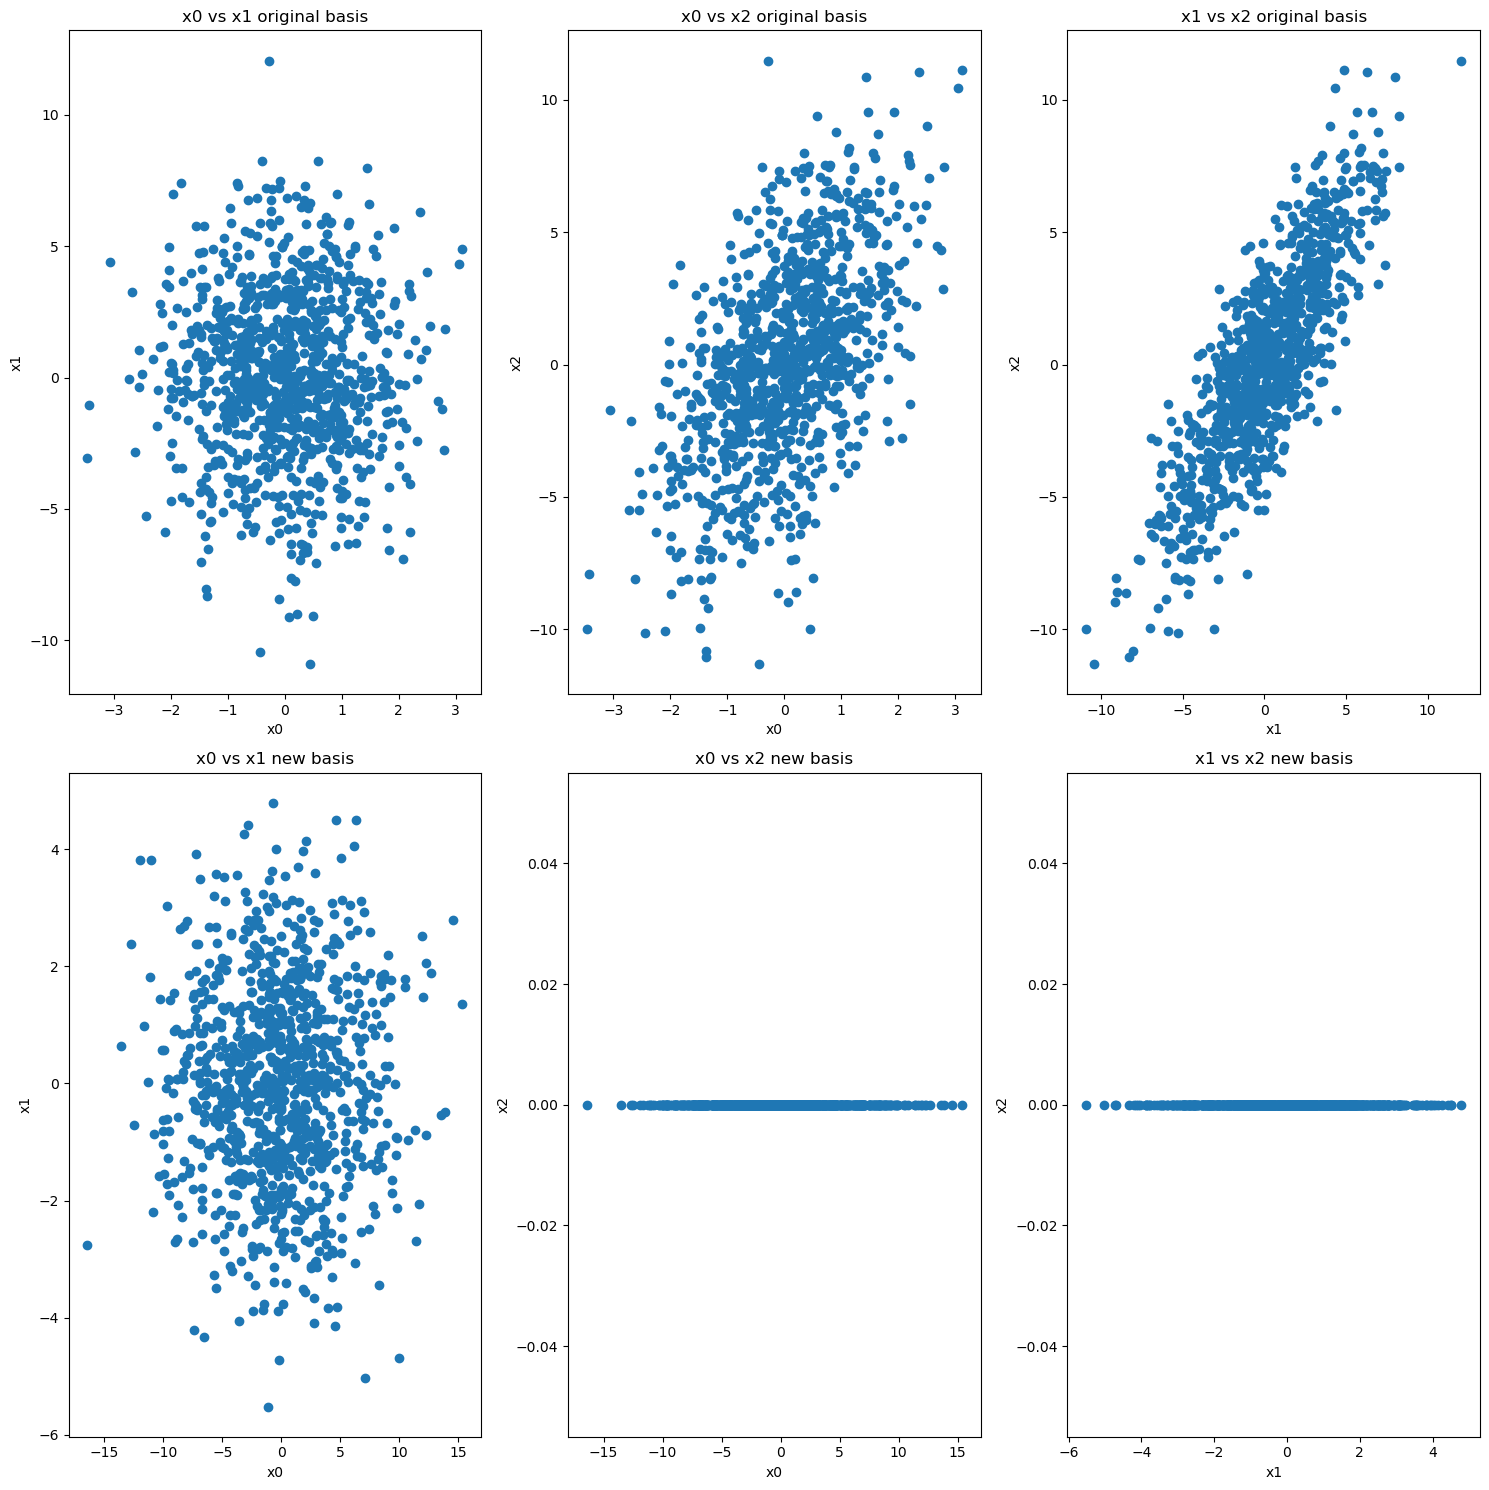

In [13]:
#creo il rumore e lo aggiungo alle singole componenti
size = (1000, 10)
w1 = np.random.normal(0, 1/20, size)
w1 = w1.sum(axis=1)
x1 = x1 + w1
w2 = np.random.normal(0, 3/20, size)
w2 = w2.sum(axis=1)
x2 = x2 + w2
x3 = 2*x1 + x2
#creo il nuovo dataframe rumoroso
ndict = {'Feature 1': x1, 'Feature 2': x2, 'Feature 3': x3}
ndata = pd.DataFrame(ndict)
#ripeto i passaggi per la PCA
U, sigma, V = np.linalg.svd(ndata.cov())
eigenvalues = np.matmul(sigma, (np.matmul(V ,U)))
eigenvectors = U
print("Autovalori calcolati con SVD:")
print(eigenvalues)
print("Autovettori calcolati con SVD:")
print(eigenvectors)
print()
#riduco la dimensione degli autovettori
obiettivo = 0.99
#sommo la varianza passo passo
cumulative_variance = np.cumsum(explained)
#trovo il primo indice in cui ho >99% variabilità
dimens = np.argmax(cumulative_variance >= obiettivo) + 1
reduced = eigenvectors.copy()
#rimuovo i vettori successivi settandoli a 0
reduced[:, dimens] = 0
print("I nuovi autovettori sono:")
print(reduced, "\n")

'''
Gli autovalori e i gli autovettori di questo nuovo dataframe rumoroso sono pressoché identici a quelli del precedente,
questo probabilmente a causa della natura dell'errore aggiunto, quindi anche il plot sarà simile
'''

#Sistemo il dataframe di conseguenza
ndata99 = pd.DataFrame(ndata.values.dot(reduced), columns=["Component 1", "Component 2", "Component 3"])
print("Nuovo dataframe risultante:")
print(ndata99)

fig, axs = plt.subplots(2, 3, tight_layout=True, figsize=(15, 15))
axs[0, 0].scatter(ndata["Feature 1"], ndata["Feature 2"])
axs[0, 0].set_title("x0 vs x1 original basis")
axs[0, 0].set_xlabel("x0")
axs[0, 0].set_ylabel("x1")
axs[0, 1].scatter(ndata["Feature 1"], ndata["Feature 3"])
axs[0, 1].set_title("x0 vs x2 original basis")
axs[0, 1].set_xlabel("x0")
axs[0, 1].set_ylabel("x2")
axs[0, 2].scatter(ndata["Feature 2"], ndata["Feature 3"])
axs[0, 2].set_title("x1 vs x2 original basis")
axs[0, 2].set_xlabel("x1")
axs[0, 2].set_ylabel("x2")

axs[1, 0].scatter(ndata99["Component 1"], ndata99["Component 2"])
axs[1, 0].set_title("x0 vs x1 new basis")
axs[1, 0].set_xlabel("x0")
axs[1, 0].set_ylabel("x1")
axs[1, 1].scatter(ndata99["Component 1"], ndata99["Component 3"])
axs[1, 1].set_title("x0 vs x2 new basis")
axs[1, 1].set_xlabel("x0")
axs[1, 1].set_ylabel("x2")
axs[1, 2].scatter(ndata99["Component 2"], ndata99["Component 3"])
axs[1, 2].set_title("x1 vs x2 new basis")
axs[1, 2].set_xlabel("x1")
axs[1, 2].set_ylabel("x2")
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [ ]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 